In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import helpers.processing_helpers as ph
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
import csv
import matplotlib.pyplot as plt
from operator import itemgetter
import cmath

### Data vizualization

In [6]:
file = open("./dataset/development.csv", "r")
csvreader = csv.reader(file)

In [7]:
rows = []
for row in csvreader:
    rows.append(row)

TRAINING_DATA_with_header = np.asarray(rows)
TRAINING_DATA = TRAINING_DATA_with_header[1:TRAINING_DATA_with_header.size,:]

In [8]:
x = TRAINING_DATA[:, 0]
sensor_num = 10
y = TRAINING_DATA[:,1]
pmax = TRAINING_DATA[:, 2+5*sensor_num]
tmax = TRAINING_DATA[:, 4+5*sensor_num]

x = [float(x_i) for x_i in x]
y = [float(y_i) for y_i in y]
pmax = [float(pmax_i) for pmax_i in pmax]
tmax = [float(tmax_i) for tmax_i in tmax]

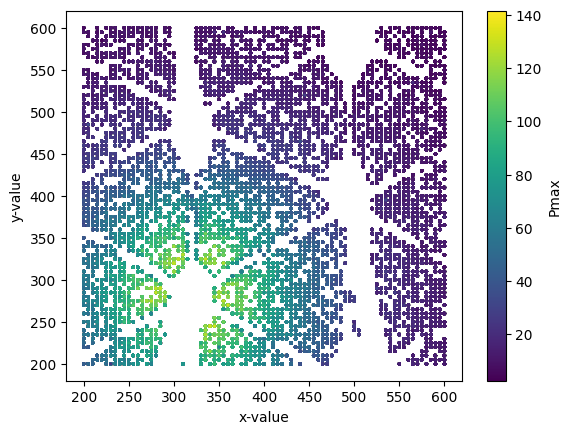

In [9]:
plt.scatter(x, y, c=pmax, cmap="viridis", s=2)
cbar = plt.colorbar()
cbar.set_label("Pmax")
plt.xlabel("x-value")
plt.ylabel("y-value")
plt.show()

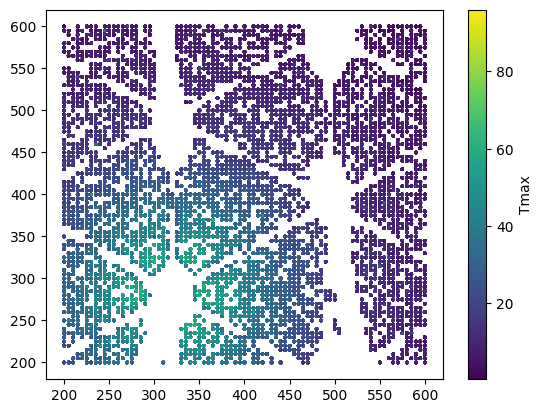

In [10]:
plt.scatter(x, y, c=tmax, cmap="viridis", s=2)
cbar = plt.colorbar()
cbar.set_label("Tmax")
plt.show()

### Feature reduction

In [11]:
df_dev = pd.read_csv("./dataset/development.csv")

In [16]:
subset = df_dev.sample(20000)

y_train_valid = subset[['x', 'y']].copy()

X_train_valid = subset.drop(columns=['x', 'y'])

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, shuffle=True, random_state=42)

In [17]:
noise_indexes = [0,7,12,15,16,17]
features = ["pmax", "negpmax", 'area', 'tmax', 'rms']

noise_removed = subset.drop(columns=ph.get_column_names(features, noise_indexes))

y_train_valid = noise_removed[['x', 'y']].copy()

X_train_valid = noise_removed.drop(columns=['x', 'y'])

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, shuffle=True, random_state=42)

X_train["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

X_valid["RANDOM"] = np.random.RandomState(42).randn(X_valid.shape[0])

In [18]:
reg = RandomForestRegressor(100, random_state=42, verbose=1)
reg.fit(X_train , y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   34.9s


RandomForestRegressor(random_state=42, verbose=1)

In [19]:
med_without_noise = ph.mean_euclid_dist(y_valid, reg.predict(X_valid))
print(med_without_noise)

6.062610597970588


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [20]:
sorted(zip(X_train.columns, reg.feature_importances_), key=lambda x: x[1],reverse=True)

[('pmax[8]', 0.3503624975225593),
 ('pmax[11]', 0.23854039210447098),
 ('pmax[10]', 0.1693923252258145),
 ('pmax[5]', 0.07060152544649362),
 ('pmax[13]', 0.041456828259207795),
 ('pmax[9]', 0.03448344102620576),
 ('negpmax[13]', 0.02457223901443441),
 ('negpmax[11]', 0.01307066273803643),
 ('negpmax[3]', 0.009570792663596303),
 ('pmax[4]', 0.006662034740066296),
 ('negpmax[10]', 0.006653462037874464),
 ('negpmax[8]', 0.0049214572504345765),
 ('negpmax[5]', 0.004253646085001614),
 ('negpmax[6]', 0.003437101701844129),
 ('pmax[3]', 0.0032496961620853237),
 ('negpmax[1]', 0.0031189142730234324),
 ('pmax[1]', 0.002933963994040729),
 ('pmax[2]', 0.001923857095524842),
 ('negpmax[14]', 0.0019183641087628508),
 ('negpmax[4]', 0.0017810926022505003),
 ('negpmax[9]', 0.0016028537570680719),
 ('pmax[6]', 0.0014300081515183937),
 ('pmax[14]', 0.0007505730813463715),
 ('area[5]', 0.00038902979280958143),
 ('area[3]', 0.0003215701192473755),
 ('negpmax[2]', 0.00029667092754005677),
 ('area[13]', 0.

In [21]:
acc_idxs = [1,2,3,4,5,6,8,9,10,11,13,14]

tmax_removed = noise_removed.drop(columns=ph.get_column_names(['tmax'], acc_idxs))

In [22]:
y_train_valid = tmax_removed[['x', 'y']].copy()

X_train_valid = tmax_removed.drop(columns=['x', 'y'])

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, shuffle=True, random_state=42)

X_train["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])
X_valid["RANDOM"] = np.random.RandomState(42).randn(X_valid.shape[0])

# https://forecastegy.com/posts/feature-importance-in-random-forests/#built-in-scikit-learn-method-with-a-random-feature

reg = RandomForestRegressor(100, random_state=42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
med_without_tmax = ph.mean_euclid_dist(y_valid, reg.predict(X_valid))
print(med_without_tmax)

6.0327113542433874


In [24]:
sorted(zip(X_train.columns, reg.feature_importances_), key=lambda x: x[1],reverse=True)

[('pmax[8]', 0.3503794638918712),
 ('pmax[11]', 0.23849346355619874),
 ('pmax[10]', 0.1693660614767319),
 ('pmax[5]', 0.07070013419559153),
 ('pmax[13]', 0.04145003559890076),
 ('pmax[9]', 0.03449232532838284),
 ('negpmax[13]', 0.024554702705411654),
 ('negpmax[11]', 0.013121459473008086),
 ('negpmax[3]', 0.009579202401376372),
 ('negpmax[10]', 0.006666476222141336),
 ('pmax[4]', 0.006655759315736216),
 ('negpmax[8]', 0.004962479410940829),
 ('negpmax[5]', 0.004159897383309266),
 ('negpmax[6]', 0.003442768144235494),
 ('pmax[3]', 0.003255460135035366),
 ('negpmax[1]', 0.003163148178149525),
 ('pmax[1]', 0.0029388455438330275),
 ('negpmax[14]', 0.001944557491477305),
 ('pmax[2]', 0.0019366088482761033),
 ('negpmax[4]', 0.0017920999323997446),
 ('negpmax[9]', 0.0016034825427910366),
 ('pmax[6]', 0.0014286997401825438),
 ('pmax[14]', 0.0007600837383579726),
 ('area[5]', 0.00039960515081880355),
 ('area[3]', 0.0003088305817291905),
 ('area[13]', 0.0003028577075142943),
 ('negpmax[2]', 0.00

In [25]:
pmax_negpmax_area = noise_removed.drop(columns=ph.get_column_names(['tmax', 'rms'], acc_idxs))

y_train_valid = pmax_negpmax_area[['x', 'y']].copy()

X_train_valid = pmax_negpmax_area.drop(columns=['x', 'y'])

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, shuffle=True, random_state=42)

In [26]:
reg = RandomForestRegressor(100, random_state=42)
reg.fit(X_train , y_train)

In [ ]:
med_without_tmax_rms = ph.mean_euclid_dist(y_valid, reg.predict(X_valid))
print(med_without_tmax_rms)

In [ ]:
sorted(zip(X_train_valid.columns, reg.feature_importances_), key=lambda x: x[1],reverse=True)